# Discovering High Utility patterns in Big Data Using HMiner Algorithm

In this tutorial, we will discuss the first approach to find High Utility patterns in big data using HMiner algorithm.

[__Basic approach:__](#basicApproach) Here, we present the steps to discover High Utility patterns using a single minimum utility value

***

## <a id='basicApproach'>Basic approach: Executing HMiner on a single dataset at a particular minimum utility value</a>

#### Step 0 : Install latest version of PAMI library

In [1]:
!pip install -U PAMI

#### Step 1: Import the HMiner algorithm

In [1]:
from PAMI.highUtilityPatterns.basic import HMiner  as alg

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'Utility_T10I4D100K.csv'
  #Users can also specify this constraint between 0 to 1.
minUtilCount=10000
seperator='\t'       

#### Step 3: Execute the HMiner algorithm

In [3]:
obj = alg.HMiner(iFile1=inputFile,minUtil=minUtilCount,  sep=seperator)    #initialize
obj.startMine()            #Start the mining process

High Utility patterns were generated successfully using HMiner algorithm


#### Step 4: Storing the generated patterns

##### Step 4.1: Storing the generated patterns in a file

In [4]:
obj.save(outFile='highUtilityPatternsMinSupCount100.txt')

##### Step 4.2. Storing the generated patterns in a data frame

In [5]:
frequentPatternsDF= obj.getPatternsAsDataFrame()

#### Step 5: Getting the statistics

##### Step 5.1: Total number of discovered patterns 

In [6]:
print('Total No of patterns: ' + str(len(frequentPatternsDF)))

Total No of patterns: 42179


##### Step 5.2: Runtime consumed by the mining algorithm

In [7]:
print('Runtime: ' + str(obj.getRuntime()))

Runtime: 255.41800045967102


##### Step 5.3: Total Memory consumed by the mining algorithm

In [8]:
print('Memory (RSS): ' + str(obj.getMemoryRSS()))
print('Memory (USS): ' + str(obj.getMemoryUSS()))

Memory (RSS): 535355392
Memory (USS): 496848896


# Advanced Tutorial on Implementing HMiner Algorithm

In this tutorial, we will discuss the second approach to find High Utility patterns in big data using HMiner algorithm.

[__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover High Utility patterns using multiple minimum utility values.

***

#### In this tutorial, we explain how the HMiner algorithm  can be implemented by varying the minimum utility values

#### Step 1: Import the HMiner algorithm and pandas data frame

In [1]:
from PAMI.highUtilityPatterns.basic import HMiner  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'Utility_T10I4D100K.csv'
minUtilList=[10000, 20000, 30000, 40000, 50000]
seperator='\t'
result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory'])
#initialize a data frame to store the results of HMiner algorithm

#### Step 3: Execute the HMiner algorithm using a for loop

In [3]:
algorithm = 'HMiner'  #specify the algorithm name
for minimumUtility in minUtilList:
    obj = alg.HMiner(iFile1=inputFile, minUtil=minimumUtility, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minimumUtility, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]

High Utility patterns were generated successfully using HMiner algorithm
High Utility patterns were generated successfully using HMiner algorithm
High Utility patterns were generated successfully using HMiner algorithm
High Utility patterns were generated successfully using HMiner algorithm
High Utility patterns were generated successfully using HMiner algorithm


In [4]:
print(result)

  algorithm  minSup  patterns     runtime     memory
0    HMiner   10000     42179  252.231760  535769088
1    HMiner   20000     23299  147.045262  534962176
2    HMiner   30000     14468  105.271687  532291584
3    HMiner   40000      9408   84.806405  530472960
4    HMiner   50000      5968   73.972150  528809984


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

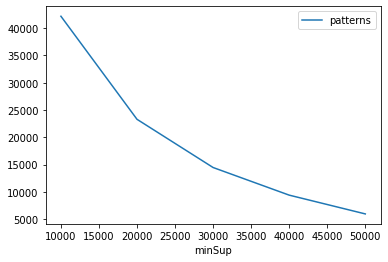

Graph for No Of Patterns is successfully generated!


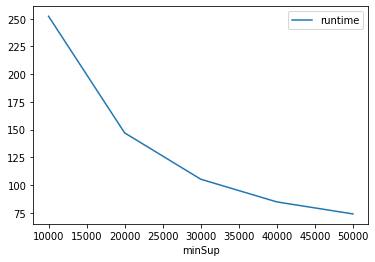

Graph for Runtime taken is successfully generated!


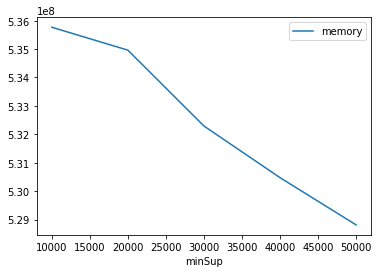

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
